<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Method to solve the equation

In [ ]:
import numpy as np

def calculate(b0, d1, d2, ee, ei, ep):
  if(abs((ep-ei)/(ei+ee))<1):
    result = b0 - d1 * ((abs((ep-ei)/(ei+ee)) * np.arctanh((ep-ei)/(ei+ee))) - (d2 * ((ep-ei)/(ei+ee))));
  return result;

In [ ]:
b0 = 2775;
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
print(calculate(b0, d1, d2, ee, ei, ep))

3167.1162169659724


# Find the best b0 value

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Iterate over B0 values and find the one with least MSE
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
best_b0 = None
min_mse = float('inf')
count=0;
for b0 in range(1520, 6201, 10):
    count+=1
    mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
    if mse < min_mse:
        min_mse = mse
        best_b0 = b0
print("Count:",count)
print("Best B0 value:", best_b0)
print("Corresponding MSE:", min_mse)


Count: 469
Best B0 value: 2840
Corresponding MSE: 19533.66467558023


In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
# def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
#     calculated_results = []
#     for ep in ep_values:
#         if abs((ep - ei) / (ei + ee)) < 1:
#             result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
#             calculated_results.append(result)
#         else:
#             calculated_results.append(None)  # Handle cases where the condition is not met
#     mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
#     return mse

def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    print("Calculations:")
    calculated_results = []
    for i, ep in enumerate(ep_values):
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            print("There is a problem")
            calculated_results.append(None)  # Handle cases where the condition is not met

    # Calculate the squared differences
    squared_diffs = [(orig - calc) ** 2 for orig, calc in zip(original_results, calculated_results)]

    # Calculate the mean squared error
    mse = np.mean(squared_diffs)

    # Print the steps and MSE
    print("Steps:")
    for i, (orig, calc) in enumerate(zip(original_results, calculated_results)):
        print(f"Step {i+1}: ({orig} - {calc})^2 = {squared_diffs[i]}")
    print(f"\nMSE = {mse}")

    return mse


# Iterate over B0 values and find the one with least MSE
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
best_b0 = None
min_mse = float('inf')
count=0;
# for b0 in range(1520, 6201, 10):
#     count+=1
#     mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
#     if mse < min_mse:
#         min_mse = mse
#         best_b0 = b0
# print("Count:",count)
mse = calculate_mse(2820, d1, d2, ee, ei, ep_values, original_results)

# print("Best B0 value:", best_b0)
# print("Corresponding MSE:", min_mse)


Calculations:
Steps:
Step 1: (4557.801 - 4406.975114110967)^2 = 22748.44785421163
Step 2: (4340.823 - 3871.217942553082)^2 = 220528.90997972334
Step 3: (4143.69 - 3675.854758460201)^2 = 218869.81322660163
Step 4: (3965.269 - 3549.472570099877)^2 = 172886.67111768774
Step 5: (3804.455 - 3454.7468750777466)^2 = 122295.77263663833
Step 6: (3660.174 - 3378.5972994342847)^2 = 79285.43830147451
Step 7: (3531.381 - 3314.843684807042)^2 = 46888.40887097443
Step 8: (3417.059 - 3260.054185407189)^2 = 24650.511805323044
Step 9: (3316.223 - 3212.1162169659724)^2 = 10838.222273694088
Step 10: (3227.915 - 3169.632373021165)^2 = 3396.8646075539955
Step 11: (3151.208 - 3131.6279215591767)^2 = 383.3794717487973
Step 12: (3085.204 - 3097.3946662014796)^2 = 148.61234243589257
Step 13: (3029.033 - 3066.401215223903)^2 = 1396.3835090199366
Step 14: (2981.856 - 3038.2383365611304)^2 = 3178.967876092555
Step 15: (2942.863 - 3012.5840849727992)^2 = 4861.029689784316
Step 16: (2911.274 - 2989.1806712389725)^2 

# Find the best d1 and d2 values.


In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Initialize variables to store best parameters
b0 = 2775;
ee = 0.001;
ei = 0.165;
best_d1 = None
best_d2 = None
min_mse = float('inf')

# Nested loops to iterate over d1 and d2 values
for d1 in range(400, 10001, 10):
    for d2 in np.arange(0.05, 0.34, 0.05):
        mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
        if mse < min_mse:
            min_mse = mse
            best_d1 = d1
            best_d2 = d2

print("Best d1 value:", best_d1)
print("Best d2 value:", best_d2)
print("Corresponding MSE:", min_mse)


Best d1 value: 720
Best d2 value: 0.05
Corresponding MSE: 11658.337491330685


# Find the best b0, d1 and d2 values

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.001;
ei = 0.165;
best_b0 = None
best_d1 = None
best_d2 = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, and D2 values
for b0_value in range(1520, 6201, 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.1):
            mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei, ep_values, original_results)
            if mse_value < min_mse:
                min_mse = mse_value
                best_b0 = b0_value
                best_d1 = d1_value
                best_d2 = d2_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Corresponding MSE:", min_mse)


Best B0 value: 2820
Best D1 value: 720
Best D2 value: 0.05
Corresponding MSE: 9523.969478497303


# Find the best d1, d2 and ei values

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_calculated_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_calculated_results)]) - np.array(valid_calculated_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.001;
b0 = 2880;
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over D1, D2, and Ei value
for d1_value in range(400, 10001, 20):
    for d2_value in np.arange(0.05, 0.34, 0.05):
        for ei_value in np.arange(0.09, 0.285, 0.5):
            mse_value = calculate_mse(b0, d1_value, d2_value, ee, ei_value, ep_values, original_results)
            if mse_value < min_mse:
                    min_mse = mse_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best D1 value: 440
Best D2 value: 0.05
Best Ei value: 0.09
Corresponding MSE: 151741.59449007924


# Find the best b0, d1, d2 and ei values - using for loops

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    return mse

# Initialize variables to store best parameters
ee = 0.001;
best_b0 = None
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(1520, 6201, 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.1):
                mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_b0 = b0_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best B0 value: 2700
Best D1 value: 800
Best D2 value: 0.05
Best Ei value: 0.19
Corresponding MSE: 19082.465465563444


# Determine b0 using interpolation

Cubic Polynomial Coefficients: [ 7.31356743e+00  1.95938002e+06 -1.56997104e+06  4.20104939e+05
 -4.54570942e+04  4.55780103e+03]

Polynomial Equation: 7.313567 x^5 + 1959380.017111 x^4 + -1569971.044005 x^3 + 420104.939062 x^2 + -45457.094188 x^1 + 4557.801026

Derivative Equation: 36.567837 x^4 + 7837520.068442 x^3 + -4709913.132016 x^2 + 840209.878125 x^1 + -45457.094188

Roots (Zeros) of the Derivative Equation: [-2.14328838e+05  3.28043639e-01  1.67079982e-01  1.05819510e-01]

For x = -214328.838110, y = 826940678179840432906698752.000000
For x = 0.328044, y = 2122.522092
For x = 0.167080, y = 2894.690659
For x = 0.105820, y = 2837.153082



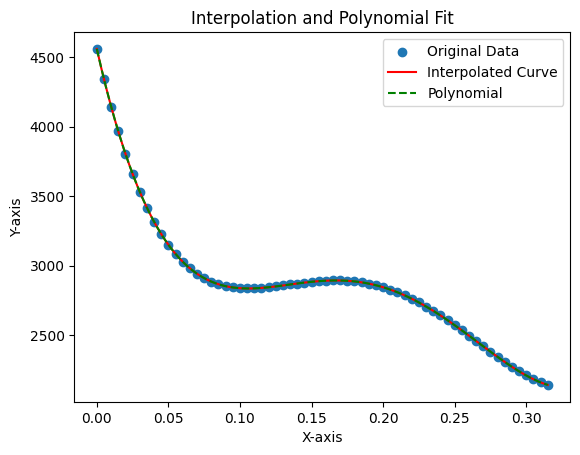

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['t.strain'].values
y = df['hard.Rate'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"
    # cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


In [ ]:
b0_values = y_roots
b0_values

# Calculate the median of b0
median_b0 = np.median(b0_values)

# Find the index of the value farthest from the median
idx_odd_one_out = np.argmax(np.abs(b0_values - median_b0))

# Remove the odd one out
b0_filtered = np.delete(b0_values, idx_odd_one_out)

print("Filtered b0 array:", b0_filtered,'\n')

# Sort the b0 values from lowest to highest
b0_sorted = np.sort(b0_filtered)

# Calculate the average of the b0 values
b0_average = np.mean(b0_filtered)

print("Average of the b0 values:", b0_average)



Filtered b0 array: [2122.52209199 2894.69065938 2837.15308152] 

Average of the b0 values: 2618.121944295937


# Determine the optimal values for b0, d1, d2, and ei, utilizing the previously determined value for b0.

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    mse = np.mean((np.array(original_results) - np.array(calculated_results)) ** 2)
    return mse

# Iterate over B0 values and find the one with least MSE
d1 = 560;
d2 = 0.05;
ee = 0.001;
ei = 0.165;
ep = 0.04;
best_b0 = None
min_mse = float('inf')
count=0
for b0 in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
    count+=1
    mse = calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results)
    if mse < min_mse:
        min_mse = mse
        best_b0 = b0
print("Count:", count)
print("Best B0 value:", best_b0)
print("Corresponding MSE:", min_mse)


Count: 78
Best B0 value: 2832
Corresponding MSE: 19546.682721799163


In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
    # print("--------------------------------------------------")
    # a = np.array(original_results[:len(valid_results)])
    # b = np.array(valid_results)

    # # Perform the subtraction
    # c = a - b

    # # Print the values and result
    # for i in range(len(a)):
    #     print(f"{a[i]} - {b[i]} = {c[i]}")
    # return mse
    return euclidean_distance

# Initialize variables to store best parameters
ee = 0.001;
best_b0 = None
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.1):
                mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_b0 = b0_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best B0 value: 2702
Best D1 value: 800
Best D2 value: 0.05
Best Ei value: 0.19
Corresponding MSE: 1105.208246291562


###Test for given parameter values

In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate'].values
ep_values = data['t.strain'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    # mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
    # print("--------------------------------------------------")
    # a = np.array(original_results[:len(valid_results)])
    # b = np.array(valid_results)

    # # Perform the subtraction
    # c = a - b

    # # Print the values and result
    # for i in range(len(a)):
    #     print(f"{a[i]} - {b[i]} = {c[i]}")
    # return mse
    return euclidean_distance

# Initialize variables to store best parameters
ee = 0.001;
best_b0 = 2802
best_d1 = 1050
best_d2 = 0.33
best_ei = 0.165
min_mse = float('inf')

# # Nested loops to iterate over B0, D1, D2, and Ei values
# for b0_value in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
#     for d1_value in range(400, 10001, 20):
#         for d2_value in np.arange(0.05, 0.34, 0.05):
#             for ei_value in np.arange(0.09, 0.285, 0.1):
#                 mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
#                 if mse_value < min_mse:
#                     min_mse = mse_value
#                     best_b0 = b0_value
#                     best_d1 = d1_value
#                     best_d2 = d2_value
#                     best_ei = ei_value

# print("Best B0 value:", best_b0)
# print("Best D1 value:", best_d1)
# print("Best D2 value:", best_d2)
# print("Best Ei value:", best_ei)
# print("Corresponding MSE:", min_mse)


print(calculate_mse(best_b0, best_d1, best_d2, ee, best_ei, ep_values, original_results))

1206.1978782862432


# New Data

Cubic Polynomial Coefficients: [-1508842.01600001   448709.1841665    -42265.50636369     3887.16179541]

Polynomial Equation: -1508842.016000 x^3 + 448709.184167 x^2 + -42265.506364 x^1 + 3887.161795

Derivative Equation: -4526526.048000 x^2 + 897418.368333 x^1 + -42265.506364

Roots (Zeros) of the Derivative Equation: [0.12124733 0.07701031]

For x = 0.121247, y = 2669.587122
For x = 0.077010, y = 2604.278376



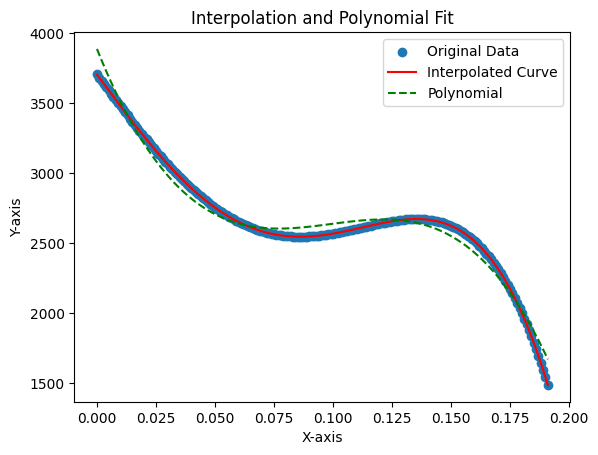

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['t.strain.2'].values
y = df['hard.Rate.2'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 3

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"
    # cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


In [ ]:
b0_values = y_roots
b0_values

# Calculate the median of b0
median_b0 = np.median(b0_values)

# Find the index of the value farthest from the median
idx_odd_one_out = np.argmax(np.abs(b0_values - median_b0))

# Remove the odd one out
b0_filtered = np.delete(b0_values, idx_odd_one_out)

print("Filtered b0 array:", b0_filtered,'\n')

# Sort the b0 values from lowest to highest
b0_sorted = np.sort(b0_filtered)

# Calculate the average of the b0 values
b0_average = np.mean(b0_filtered)

print("Average of the b0 values:", b0_average)


Filtered b0 array: [2604.2783756] 

Average of the b0 values: 2604.27837559552


In [ ]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate.2'].values
ep_values = data['t.strain.2'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
    return euclidean_distance

# Initialize variables to store best parameters
ee = 0.01;
best_b0 = None
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(2500,2700, 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.1):
                mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_b0 = b0_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


Best B0 value: 2690
Best D1 value: 580
Best D2 value: 0.05
Best Ei value: 0.09
Corresponding MSE: 2028.6185378087716


In [46]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate.2'].values
ep_values = data['t.strain.2'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    # mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
    return euclidean_distance

# Initialize variables to store best parameters
ee = 0.01;
best_b0 = 2600
best_d1 = 1600
best_d2 = 0.4
best_ei = 0.11
min_mse = float('inf')


print(calculate_mse(best_b0, best_d1, best_d2, ee, best_ei, ep_values, original_results))

2367.3595052893065


# New Data


Cubic Polynomial Coefficients: [-7.28378772e+06  8.73458976e+06 -3.99019028e+06  8.56219151e+05
 -8.52649213e+04  5.15950427e+03]

Polynomial Equation: -7283787.720000 x^5 + 8734589.761400 x^4 + -3990190.282370 x^3 + 856219.150794 x^2 + -85264.921337 x^1 + 5159.504271

Derivative Equation: -36418938.599999 x^4 + 34938359.045600 x^3 + -11970570.847109 x^2 + 1712438.301588 x^1 + -85264.921337

Roots (Zeros) of the Derivative Equation: [0.32628233+0.00748978j 0.32628233-0.00748978j 0.19274421+0.j
 0.11403703+0.j        ]

For x = 0.326282+0.007490j, y = 1949.070700-0.289011j
For x = 0.326282-0.007490j, y = 1949.070700+0.289011j
For x = 0.192744+0.000000j, y = 2079.625948+0.000000j
For x = 0.114037+0.000000j, y = 1990.079063+0.000000j



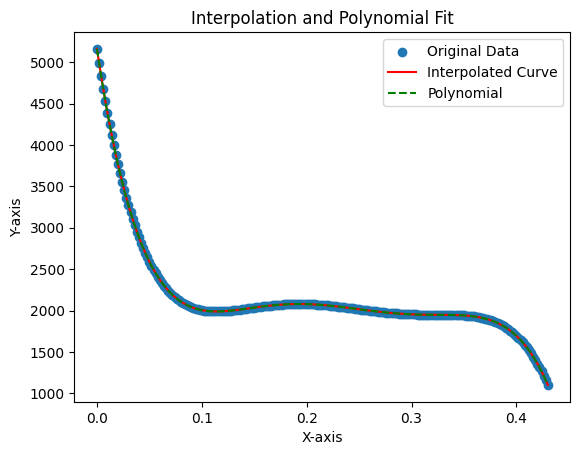

In [32]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['t.strain.3'].values
y = df['hard.Rate.3'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"
    # cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


In [33]:
b0_values = y_roots
b0_values

# Calculate the median of b0
median_b0 = np.median(b0_values)

# Find the index of the value farthest from the median
idx_odd_one_out = np.argmax(np.abs(b0_values - median_b0))

# Remove the odd one out
b0_filtered = np.delete(b0_values, idx_odd_one_out)

print("Filtered b0 array:", b0_filtered,'\n')

# Sort the b0 values from lowest to highest
b0_sorted = np.sort(b0_filtered)

# Calculate the average of the b0 values
b0_average = np.mean(b0_filtered)

print("Average of the b0 values:", b0_average)


Filtered b0 array: [1949.07070029-0.2890108j 1949.07070029+0.2890108j
 1990.07906263+0.j       ] 

Average of the b0 values: (1962.7401544023617+0j)


In [34]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate.3'].values
ep_values = data['t.strain.3'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
    return euclidean_distance

# Initialize variables to store best parameters
ee = 0.001;
best_b0 = None
best_d1 = None
best_d2 = None
best_ei = None
min_mse = float('inf')

# Nested loops to iterate over B0, D1, D2, and Ei values
for b0_value in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):
    for d1_value in range(400, 10001, 20):
        for d2_value in np.arange(0.05, 0.34, 0.05):
            for ei_value in np.arange(0.09, 0.285, 0.1):
                mse_value = calculate_mse(b0_value, d1_value, d2_value, ee, ei_value, ep_values, original_results)
                if mse_value < min_mse:
                    min_mse = mse_value
                    best_b0 = b0_value
                    best_d1 = d1_value
                    best_d2 = d2_value
                    best_ei = ei_value

print("Best B0 value:", best_b0)
print("Best D1 value:", best_d1)
print("Best D2 value:", best_d2)
print("Best Ei value:", best_ei)
print("Corresponding MSE:", min_mse)


<ipython-input-34-0a84eab515ae>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  for b0_value in range(int(b0_sorted[0]), int(b0_sorted[-1]), 10):


Best B0 value: 1989
Best D1 value: 800
Best D2 value: 0.3
Best Ei value: 0.19
Corresponding MSE: 6481.446503656905


In [35]:
import numpy as np
import pandas as pd

# Read data from Excel file
data = pd.read_excel("/content/Data.xlsx")
original_results = data['hard.Rate.3'].values
ep_values = data['t.strain.3'].values

# Define function to calculate MSE
def calculate_mse(b0, d1, d2, ee, ei, ep_values, original_results):
    calculated_results = []
    for ep in ep_values:
        if abs((ep - ei) / (ei + ee)) < 1:
            result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
            calculated_results.append(result)
        else:
            calculated_results.append(None)  # Handle cases where the condition is not met
    valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
    # mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
    euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
    return euclidean_distance

# Initialize variables to store best parameters
ee = 0.001;
best_b0 = 2100
best_d1 = 450
best_d2 = 0.05
best_ei = 0.22
min_mse = float('inf')


print(calculate_mse(best_b0, best_d1, best_d2, ee, best_ei, ep_values, original_results))

5703.354344480219


# Finding the slope

Slope Data:
    Point Number         Slope
0              1 -45456.015140
1              2 -41373.142430
2              3 -37518.015140
3              4 -33887.197009
4              5 -30474.196824
5              6 -27273.015697
6              7 -24278.140390
7              8 -21483.422744
8              9 -18882.968634
9             10 -16471.102721
10            11 -14241.620482
11            12 -12189.015349
12            13 -10307.318121
13            14  -8590.512168
14            15  -7032.633208
15            16  -5628.155002
16            17  -4370.946785
17            18  -3255.057858
18            19  -2275.021783
19            20  -1424.455012
20            21   -697.758171
21            22    -88.912306
22            23    407.807394
23            24    798.282729
24            25   1088.661689
25            26   1284.470513
26            27   1391.656258
27            28   1416.304456
28            29   1364.125920
29            30   1240.991865
30            31   1053.106

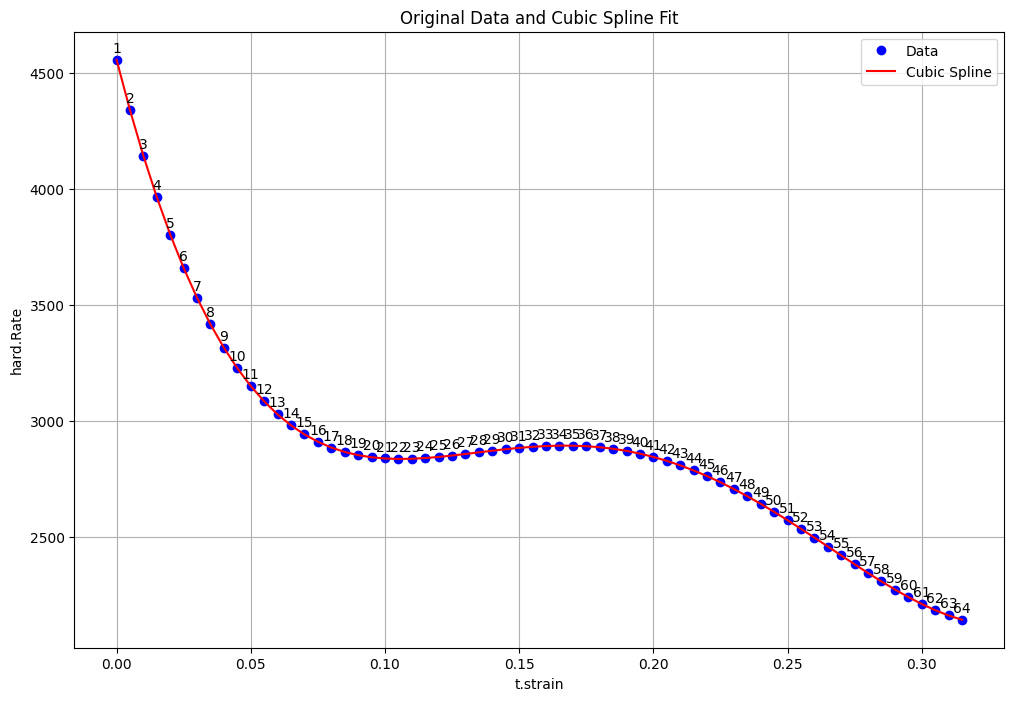

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = ["t.strain", "hard.Rate"]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x, y)):
    slope = slopes[i]
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Create a table for slopes for each point
slope_data = {'Point Number': np.arange(1, len(x) + 1), 'Slope': slopes}
slope_table = pd.DataFrame(slope_data)

print("Slope Data:")
print(slope_table)

plt.show()

# Actual d1 = 1050

Slope Data:
     Point Number         Slope
0               1 -22694.776713
1               2 -22718.326741
2               3 -22728.527944
3               4 -22725.531070
4               5 -22709.597224
5               6 -22680.957939
6               7 -22639.852673
7               8 -22586.518762
8               9 -22521.194108
9              10 -22444.116463
10             11 -22355.523619
11             12 -22255.653356
12             13 -22144.743458
13             14 -22023.031709
14             15 -21890.755892
15             16 -21748.153789
16             17 -21595.463186
17             18 -21432.921864
18             19 -21260.767606
19             20 -21079.238197
20             21 -20888.571420
21             22 -20689.005057
22             23 -20480.776892
23             24 -20264.124709
24             25 -20039.286290
25             26 -19806.499419
26             27 -19566.001879
27             28 -19318.031454
28             29 -19062.825926
29             30 -18800.623

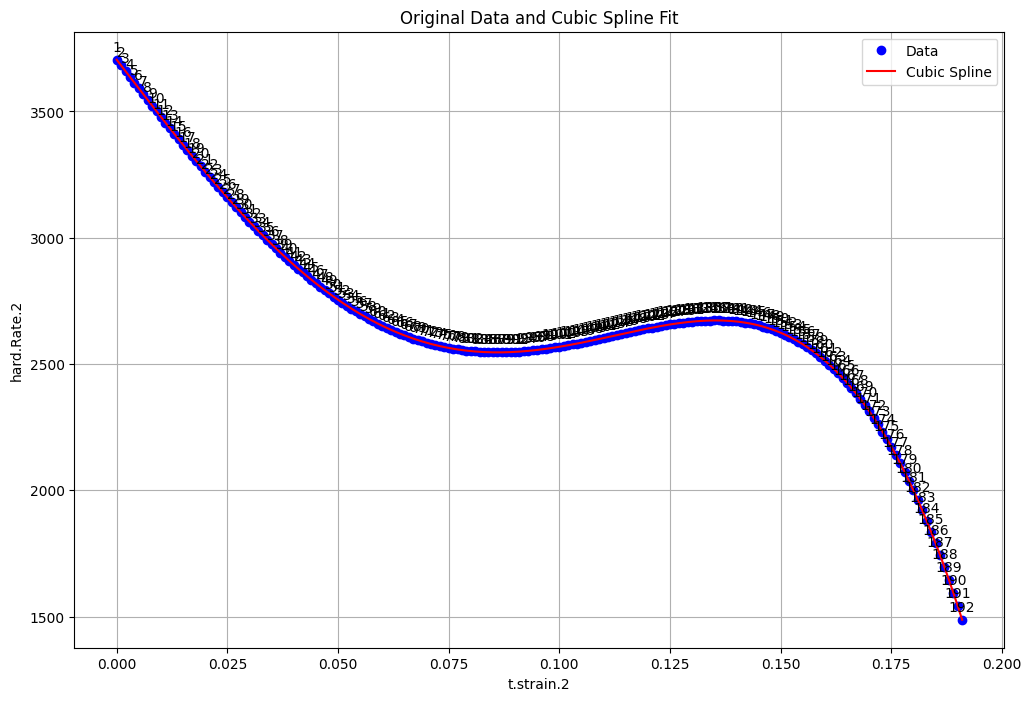

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = ["t.strain.2", "hard.Rate.2"]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x, y)):
    slope = slopes[i]
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Create a table for slopes for each point
slope_data = {'Point Number': np.arange(1, len(x) + 1), 'Slope': slopes}
slope_table = pd.DataFrame(slope_data)

print("Slope Data:")
print(slope_table)

plt.show()

# Actual d1 = 1600

Slope Data:
     Point Number         Slope
0               1 -85264.622644
1               2 -81887.728029
2               3 -78604.449015
3               4 -75413.738259
4               5 -72313.790574
5               6 -69303.021571
6               7 -66379.805431
7               8 -63542.545166
8               9 -60789.653796
9              10 -58119.559392
10             11 -55530.703724
11             12 -53021.542623
12             13 -50590.545884
13             14 -48236.197293
14             15 -45956.994621
15             16 -43751.449620
16             17 -41618.088032
17             18 -39555.449580
18             19 -37562.087973
19             20 -35636.570905
20             21 -33777.480055
21             22 -31983.411088
22             23 -30252.973651
23             24 -28584.791378
24             25 -26977.501888
25             26 -25429.756784
26             27 -23940.221653
27             28 -22507.576070
28             29 -21130.513591
29             30 -19807.741

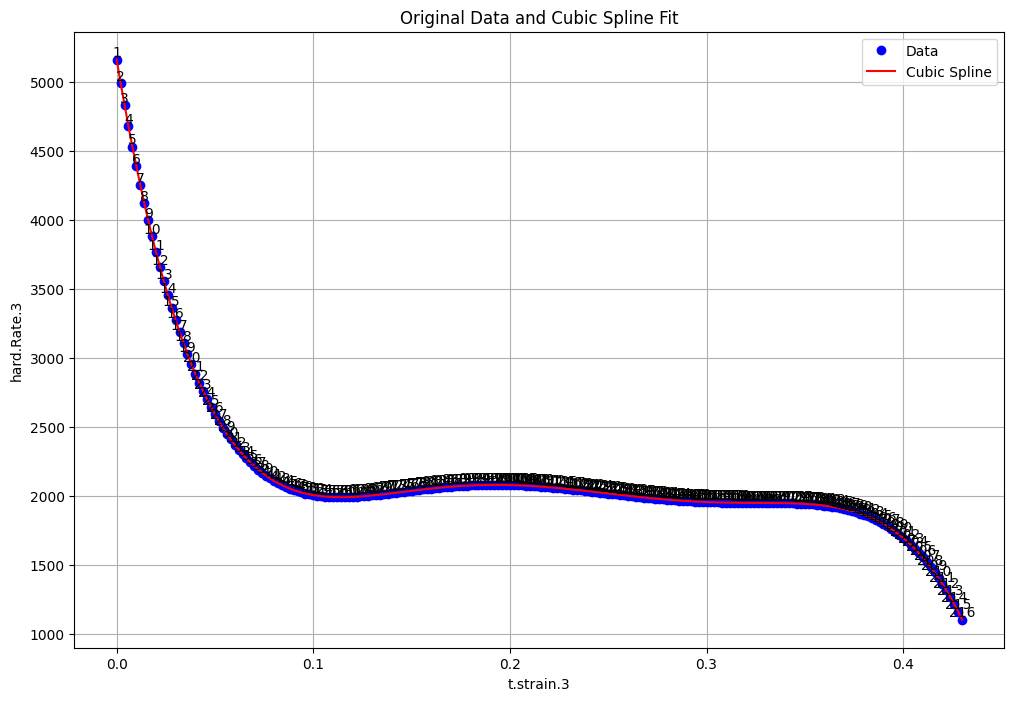

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = ["t.strain.3", "hard.Rate.3"]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x, y)):
    slope = slopes[i]
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Create a table for slopes for each point
slope_data = {'Point Number': np.arange(1, len(x) + 1), 'Slope': slopes}
slope_table = pd.DataFrame(slope_data)

print("Slope Data:")
print(slope_table)

plt.show()

# Actual d1 = 450